# ML102 - Logistic Regression

## 1. Demo - Univariate Logistic Regression

### 1.1. Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.datasets import load_iris

### 1.2. Generate data with noise

Note: Here you would normally ingest data you sourced or are provided, and clean it using skills learned in e.g. Data Wrangling 101

In [2]:
np.random.seed(42)
n = 100
x = np.random.uniform(-3, 3, n)
u = np.random.uniform(0, 1, n)
y = np.array([int(ui <= norm.cdf(xi)) for ui, xi in zip(u, x)])
df = pd.DataFrame({
    'x': x,
    'y': y
})
df

,x,y
0,-0.752759,1
1,2.704286,1
2,1.391964,1
3,0.591951,1
4,-2.063888,0
...,...,...
95,-0.037226,1
96,0.136397,0
97,-0.434754,0
98,-2.847485,0


<Axes: xlabel='x', ylabel='y'>

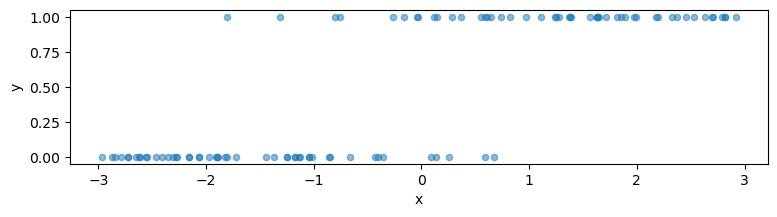

In [3]:
df.plot.scatter(x = 'x', y = 'y', alpha = 0.5, figsize = (9,2))

### 1.3 Try a Linear Regression

It works alright for the intermediate range, but quickly makes less and less sense in the extremities

In [4]:
lm = LinearRegression()
lm.fit(x.reshape(-1,1), y)

LinearRegression()

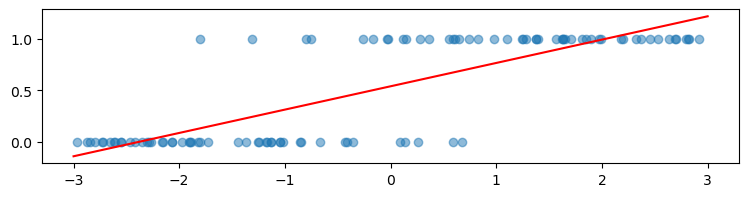

In [5]:
plt.figure(figsize = (9,2))
plt.scatter(x, y, alpha = 0.5)
plt.plot(np.linspace(-3, 3, n), lm.predict(np.linspace(-3, 3, n).reshape(-1,1)), c='r');

### 1.4. Fit a Logistic Regression model to the data

Scikit-learn makes it easy to create model instances. Check out [Scikit-learn's Logistic Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for more information on the class' methods and attributes.

*Note*: We're not doing a train test split in this notebook, but in practice you really should!

In [6]:
model = LogisticRegression()
model.fit(x.reshape(-1,1), y)

LogisticRegression()

### 1.5. Check the results

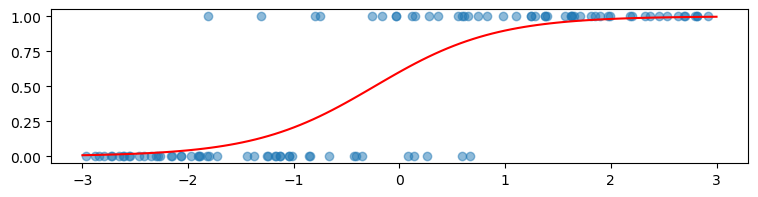

In [7]:
plt.figure(figsize = (9,2))
plt.scatter(x, y, alpha = 0.5)
plt.plot(np.linspace(-3, 3, n), model.predict_proba(np.linspace(-3, 3, n).reshape(-1,1))[:,1], c='r');

The formula for the regression is $$p = \frac{1}{1+e^{-({{0.41}} + {{1.76}} X)}}$$

In [8]:
model.intercept_, model.coef_

(array([0.41440356]), array([[1.76300894]]))

### 1.6. Evaluate the model

Logistic Regression uses a different set of evaluation metrics to its loss. Given that the model predicts a 1 or 0 for each instance, and the true value is either a 1 or 0, we get the following cases:
    
1. __True positives__: actual = 1, predicted = 1
2. __True negatives__: actual = 0, predicted = 0
3. __False positives__: actual = 0, predicted = 1
4. __False negatives__: actual = 1, predicted = 0

From this, we can calculate the following classification metrics (and more...):

1. __Accuracy__: TP + TN / total
2. __Precision__: TP / (TP + FP) (how many of the instances the model predicted as 1 were actually 1)
3. __Recall__: TP / (TP + FN) (how many of the overall actual 1's did the model predict as 1)

We can also visualise these values on a __Confusion matrix__

You can learn more about the various metrics [here](https://scikit-learn.org/stable/api/sklearn.metrics.html) and [here](https://cohere.com/blog/classification-eval-metrics)

*Note*: again, this should really be done on the test set....

In [9]:
y_pred = model.predict(x.reshape(-1,1))
print('Accuracy:', accuracy_score(y, y_pred))
print('Precision:', precision_score(y, y_pred))
print('Recall:', recall_score(y, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y, y_pred))

Accuracy: 0.9
Precision: 0.9
Recall: 0.9
Confusion Matrix:
[[45  5]
 [ 5 45]]


### 1.7. A look at the loss

Like in linear regression, the loss is convex and there is a global minimum

In [10]:
def sigmoid(t):
    return 1 / (1 + np.exp(-1 * t))

def loss_function(b0, b1, x, y):
    beta0i = np.array([b0 for i in range(len(x))])
    beta1i = np.array([b1 for i in range(len(x))])
    xi = np.array([e * np.ones(beta0m.shape) for e in x])
    yi = np.array([e * np.ones(beta0m.shape) for e in y])
    beta1_times_xi = beta1i * xi
    yhati = beta0i + beta1_times_xi
    phati = sigmoid(yhati)
    lossi = -1 * np.log(phati) * yi - np.log(1.0 - phati) * (1.0 - yi)
    return np.mean(lossi, axis=0)
    

In [11]:
beta0 = np.arange(-0.2,2.5,0.005)
beta1 = np.arange(-0.2,5,0.005)
beta0m, beta1m = np.meshgrid(beta0, beta1)
L = loss_function(beta0m, beta1m, x, y)

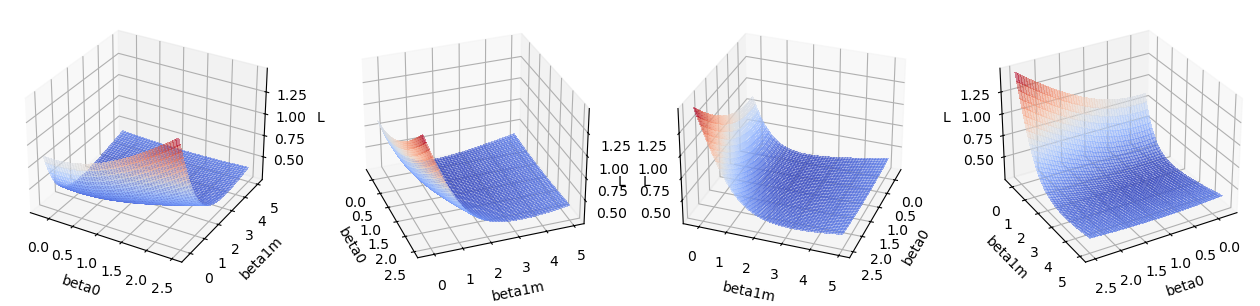

In [12]:
fig = plt.figure(figsize=plt.figaspect(0.25))

for i, az in enumerate([-60, -20, 20, 60]):
    ax = fig.add_subplot(1, 4, i+1, projection='3d')
    ax.plot_surface(beta0m, beta1m, L, cmap = cm.coolwarm, antialiased = False, alpha = 0.5)
    ax.set_xlabel('beta0')
    ax.set_ylabel('beta1m')
    ax.set_zlabel('L')
    ax.view_init(elev=30, azim=az)

plt.show()

In [13]:
# get coeffs corresponding to lowest loss
beta1hat = beta1[np.unravel_index(L.argmin(), L.shape)[0]]
beta0hat = beta0[np.unravel_index(L.argmin(), L.shape)[1]]
print(beta0hat, beta1hat)

0.4750000000000006 1.990000000000002


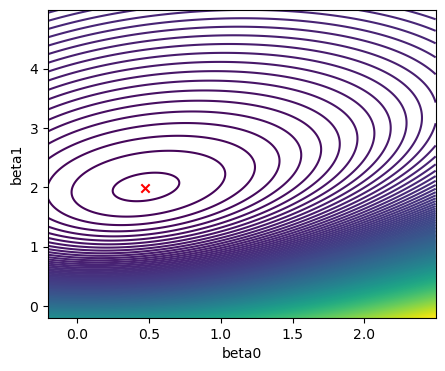

In [14]:
plt.figure(figsize=(5,4))
plt.contour(beta0m, beta1m, L, 200)
plt.scatter(beta0hat, beta1hat, marker='x', c = 'r')
plt.xlabel('beta0')
plt.ylabel('beta1')
plt.show();

## 2. Multivariate Logistic Regression

We can conduct logistic regression on more than one feature. Here we'll examine it on two, but it can be generalised to higher dimensions

### 2.1. Generate data

This time the outcomes are against two features `X1` and `X2`, and the dots sit at either level `z=0` or `z=1`

In [15]:
np.random.seed(42)
X1 = np.random.uniform(-3, 3, n)
X2 = np.random.uniform(-3, 3, n)
u = np.random.uniform(0, 1, n)
z = np.array([int(ui <= norm.cdf(x1i + 0.5 * x2i)) for ui, x1i, x2i in zip(u, X1, X2)])

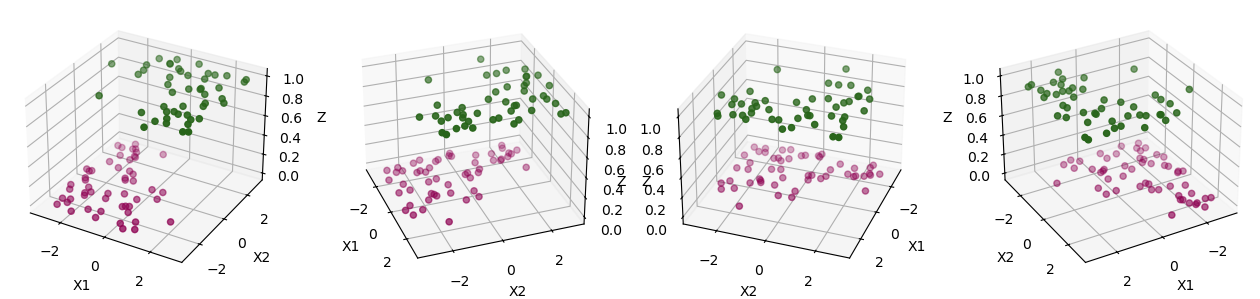

In [16]:
fig = plt.figure(figsize=plt.figaspect(0.25))

for i, az in enumerate([-60, -20, 20, 60]):
    ax = fig.add_subplot(1, 4, i+1, projection='3d')
    ax.scatter(X1, X2, z, c=z, cmap='PiYG')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Z')
    ax.view_init(elev=30, azim=az)

### 2.2. Fit model onto data

In [17]:
X = np.concatenate((X1.reshape(-1,1), X2.reshape(-1,1)), axis = 1)

In [18]:
model2 = LogisticRegression()
model2.fit(X, z)

LogisticRegression()

### 2.3. Check results

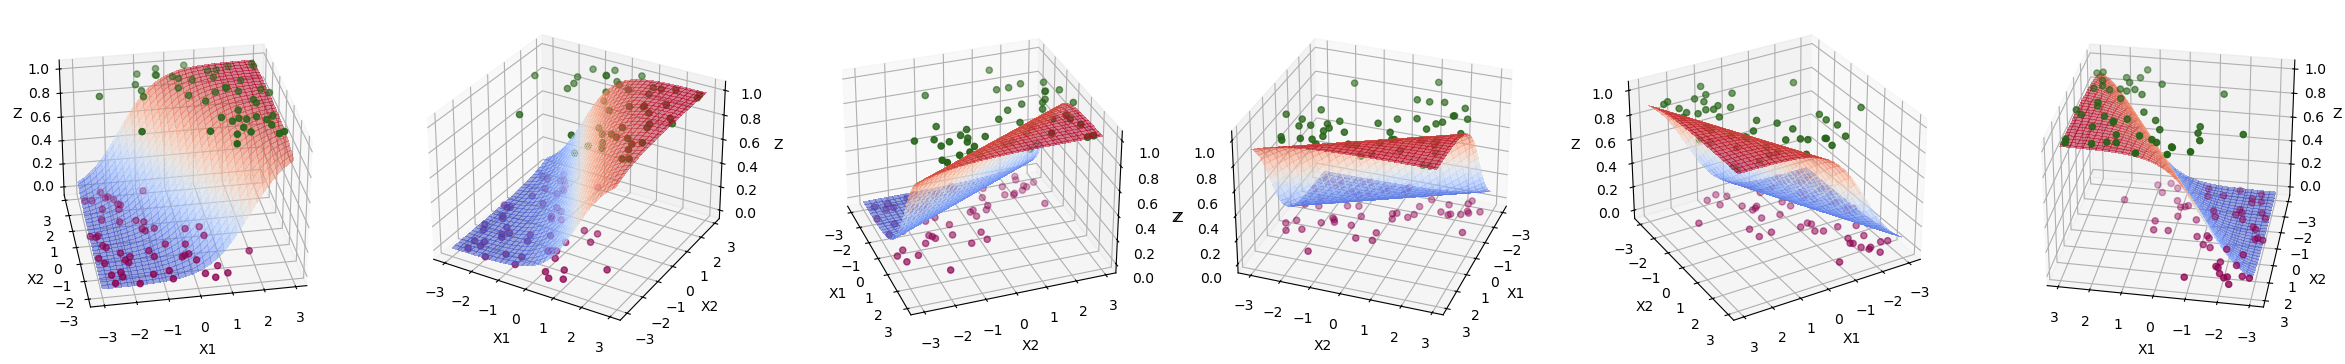

In [19]:
X1m = np.arange(-3,3,0.1)
X2m = np.arange(-3,3,0.1)
X1m, X2m = np.meshgrid(X1m, X2m)
zm = 1 / (1 + np.exp(-1*(model2.intercept_ + model2.coef_[0,0] * X1m + model2.coef_[0,1] * X2m)))


fig = plt.figure(figsize=(30, 5))

for i, az in enumerate([-100, -60, -20, 20, 60, 100]):
    ax = fig.add_subplot(1, 6, i+1, projection='3d')
    ax.plot_surface(X1m, X2m, zm, cmap = cm.coolwarm, antialiased = False, alpha = 0.5)
    ax.scatter(X1, X2, z,  c=z, cmap='PiYG')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Z')
    ax.view_init(elev=30, azim=az)

plt.show()

In [20]:
b0 = model2.intercept_[0]
b1 = model2.coef_[0,0]
b2 = model2.coef_[0,1]

b0, b1, b2

(0.03715148088329627, 1.6299499010425358, 0.8731956811440394)

The formula for the regression is $$p = \frac{1}{1+e^{-({{0.04}} + {{1.63}} X_1 + {{0.87}} X_2)}}$$

### 2.4. Evaluate the model

In [21]:
z_pred = model2.predict(X)
print('Accuracy:', accuracy_score(z, z_pred))
print('Precision:', precision_score(z, z_pred))
print('Recall:', recall_score(z, z_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(z, z_pred))

Accuracy: 0.88
Precision: 0.8888888888888888
Recall: 0.851063829787234

Confusion Matrix:
[[48  5]
 [ 7 40]]


## 3. Open Exercise

Below is a dataset for iris flowers. You can read about the Scikit-learn loading method [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) and about the dataset itself [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset).

**Tasks**

1. Examine the dataset and its features
2. Split the dataset into train and test, making sure the split is reproducible (*Hint*: this is done in the linear regression code)
3. Perform some EDA - e.g. how does the target variable look against each feature? Can you spot any patterns?
4. Perform univariate regression against individual features and evaluate them against the test set
5. Perform multivariate regression against some or all of the features. Which combinations give the best evaluation against the test set? And what metric are you using to determine this?

In [22]:
# https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_iris.html
# https://en.wikipedia.org/wiki/Iris_flower_data_set
iris = load_iris()
X = iris.data[:,2:]
y = iris.target
df=pd.DataFrame({
    iris.feature_names[2]: X[:,0],
    iris.feature_names[3]: X[:,1],
    'target': y
})
df['target name'] = df['target'].apply(lambda x: iris.target_names[x])
df.sample(frac=1).head()

,petal length (cm),petal width (cm),target,target name
78,4.5,1.5,1,versicolor
70,4.8,1.8,1,versicolor
94,4.2,1.3,1,versicolor
124,5.7,2.1,2,virginica
5,1.7,0.4,0,setosa
